<a href="https://colab.research.google.com/github/cihan53/calismalar/blob/main/3_%C3%B6rnek_%C3%A7ifti_i%C3%A7in_(x%5Bn%5D_ve_h%5Bn%5D_)_konvol%C3%BCsyonu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3 örnek çifti için (x[n] ve h[n] ) konvolüsyonu**

Hazırlayan : Cihan Öztürk\
E-mail: cihan@chy.com.tr\

Üç farklı konvülasyon fonksiyonu karşılaştırılmıştır

Son iki fonksiyon periodic_convolution_basic , periodic_convolution_fast performans amaçlı hazırlanmıştır. Hazırlanırken açık kaynaklardana yararlandım





In [191]:
from scipy import signal
import numpy as p
from matplotlib import pyplot as plt

a =p.array([1,0,1,1,1])
v = p.array([0,1,0,1,0])  
 


In [192]:
def pad_zeros_to(x, new_length):
    """Append new_length - x.shape[0] zeros to x's end via copy."""
    output = p.zeros((new_length,))
    output[:x.shape[0]] = x
    return output

def basic_convolution(x, h):    
    """Compute the discrete convolution of two sequences"""
    
    # Make x correspond to the longer signal
    if len(x) < len(h):
        x, h = h, x
        
    M = len(x)
    N = len(h)
    
    # Convenience transformations
    x = pad_zeros_to(x, M+2*(N-1))
    x = p.roll(x, N-1)
    
    h = p.flip(h)
    
    y = p.zeros(M+N-1)

    # Delay h and calculate the inner product with the 
    # corresponding samples in x
    for i in range(len(y)):
        y[i] = x[i:i+N].dot(h)
        
    return y

def periodic_convolution_basic(x, h):
    assert x.shape == h.shape, 'Inputs to periodic convolution '\
                               'must be of the same period, i.e., shape.'

    N = x.shape[0]

    output = p.zeros_like(x)

    for n in range(N):
        for m in range(N):
            output += x[m] * h[(n - m) % N]
    
    return output

def periodic_convolution_fast(x, h):
    assert x.shape == h.shape, 'Inputs to periodic convolution '\
                               'must be of the same period, i.e., shape.'

    X = p.fft.fft(x)
    H = p.fft.fft(h)

    return p.real(p.fft.ifft(p.multiply(X, H)))    
 

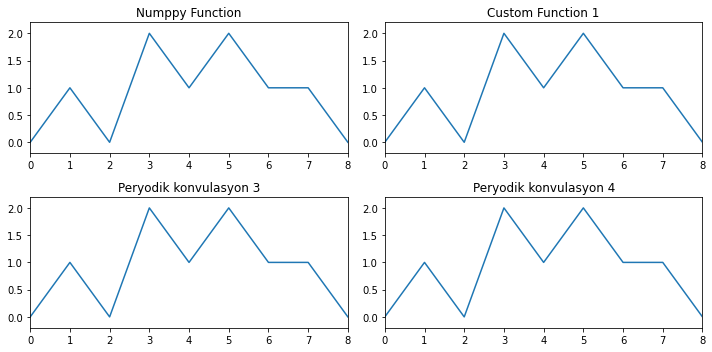

In [193]:
#Nummpy function
convolve = signal.convolve(a, v) 

#Custom funciton
_conv = basic_convolution(a,v)

#custom peryodik konvulasyon
periodic_convolution_basic(a,v)

#custom peryodik konvulasyon
periodic_convolution_fast(a,v)
  
figure_one, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 5))
ax1.plot(convolve)
ax1.set_title('Numppy Function')
ax1.margins(0, 0.1)
 

ax2.plot(_conv)
ax2.set_title('Custom Function 1')
ax2.margins(0, 0.1)

ax3.plot(convolve)
ax3.set_title('Peryodik konvulasyon 3')
ax3.margins(0, 0.1)

ax4.plot(convolve)
ax4.set_title('Peryodik konvulasyon 4')
ax4.margins(0, 0.1)

figure_one.tight_layout()
figure_one.show()
